## Libraries & Data

For creating this chart, we will need to load the following libraries:

- [matplotlib](/matplotlib) for creating the chart and the arrows
- [pandas](/pandas) for loading the data
- `numpy` for some calculations

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# set a higher resolution
plt.rcParams['figure.dpi'] = 250

# load the gapminder dataset
df = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv')
df = df.pivot_table(index='continent', columns='year', values='pop').T
df.head()

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,4.570010e+06,13806097.84,4.228356e+07,1.393736e+07,5343003.0
1957,5.093033e+06,15478156.64,4.735699e+07,1.459635e+07,5970988.0
1962,5.702247e+06,17330810.16,5.140476e+07,1.534517e+07,6641759.0
1967,6.447875e+06,19229864.92,5.774736e+07,1.603930e+07,7300207.0
1972,7.305376e+06,21175368.40,6.518098e+07,1.668784e+07,8053050.0


## Simple stacked area chart

This code uses the `ax.stackplot()` function from [matplotlib](/matplotlib) for the [stacked area chart](/stacked-area-plot) and the `ax.legend()` function for the **legend**.

The aim of this post is to show how **arrows with inflexion points** can be used to improve this kind of chart.

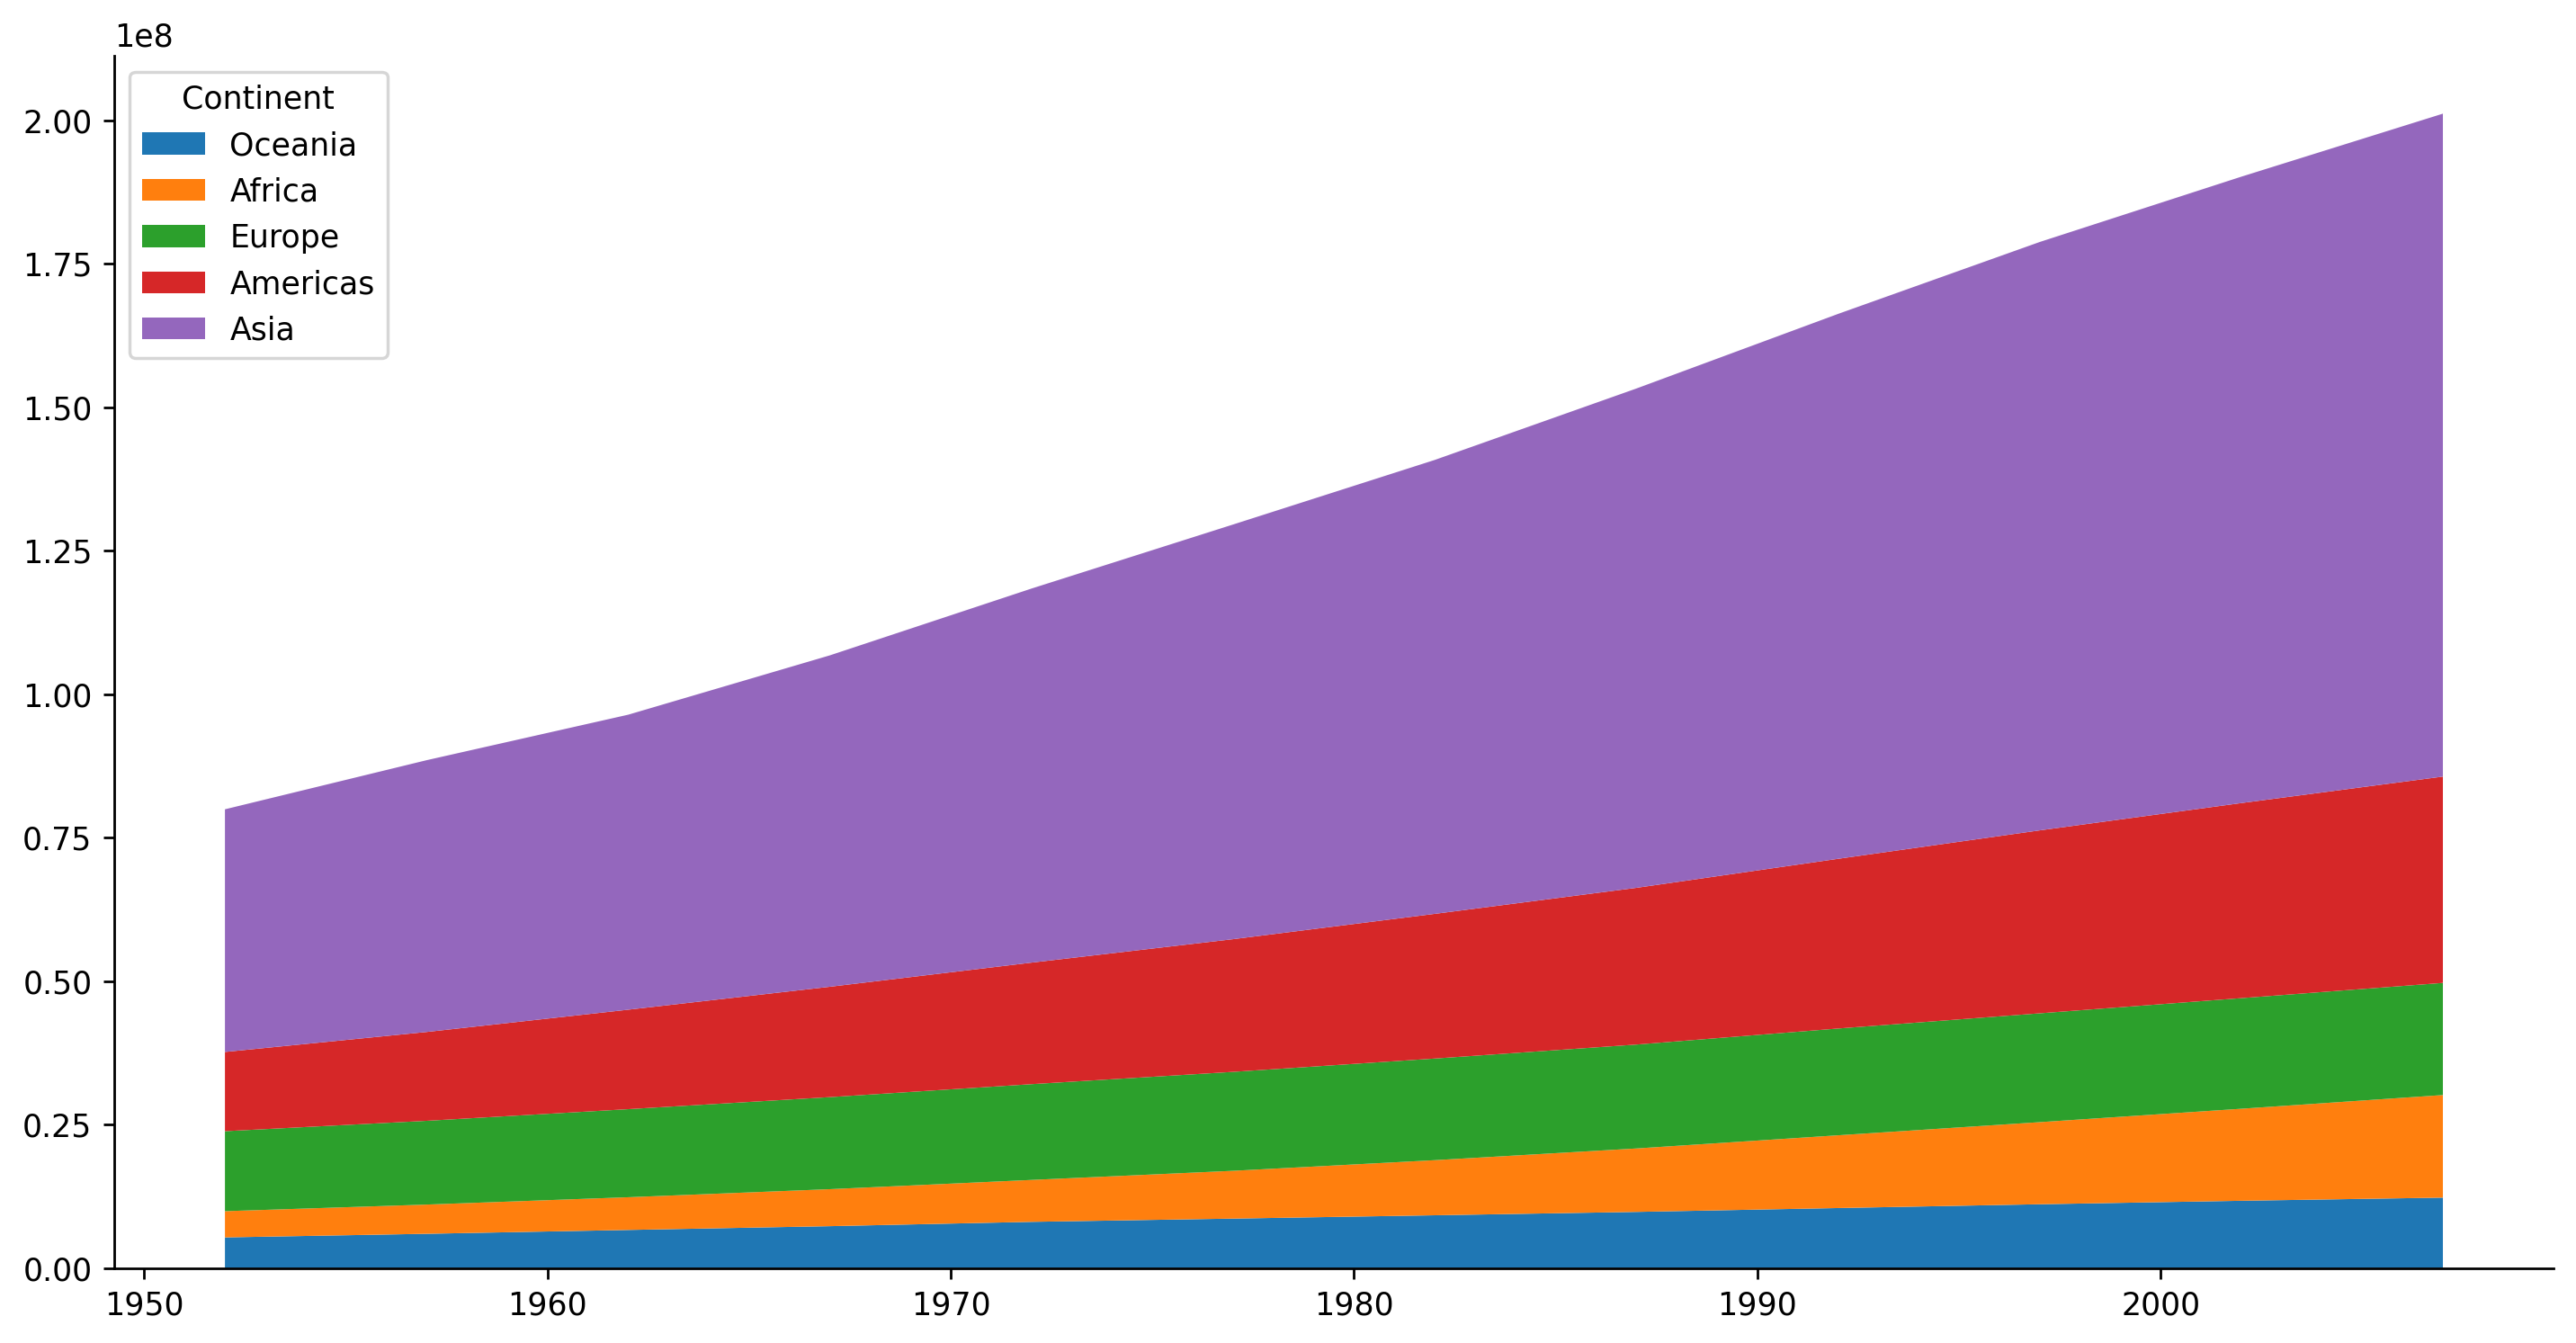

In [12]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7))
ax.spines[['top', 'right']].set_visible(False)

# define x-axis and order the columns
x = df.index
columns = columns = df.sum().sort_values().index.to_list()

# create the stackplot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas)
ax.legend(columns, loc='upper left', title='Continent')

# display the plot
plt.show()

## Simple arrow with an inflexion point

In order to make our code easier to read, we will create a function called `arrow_inflection()` that will receive the following parameters:

- an `ax`:
- a `start` and `end` point for the arrow (tuple with x and y values)
- the `angleA` and `angleB` for the arrow
- the `radius` of the inflexion point
- the `color` of the arrow (default is black)
- the `transform` for custom coordinates (default is `None`). See [this post](/589-how-to-change-coordinate-system) to learn more about this parameter.

TypeError: ConnectionStyle.Angle.__init__() got an unexpected keyword argument 'tail_width'

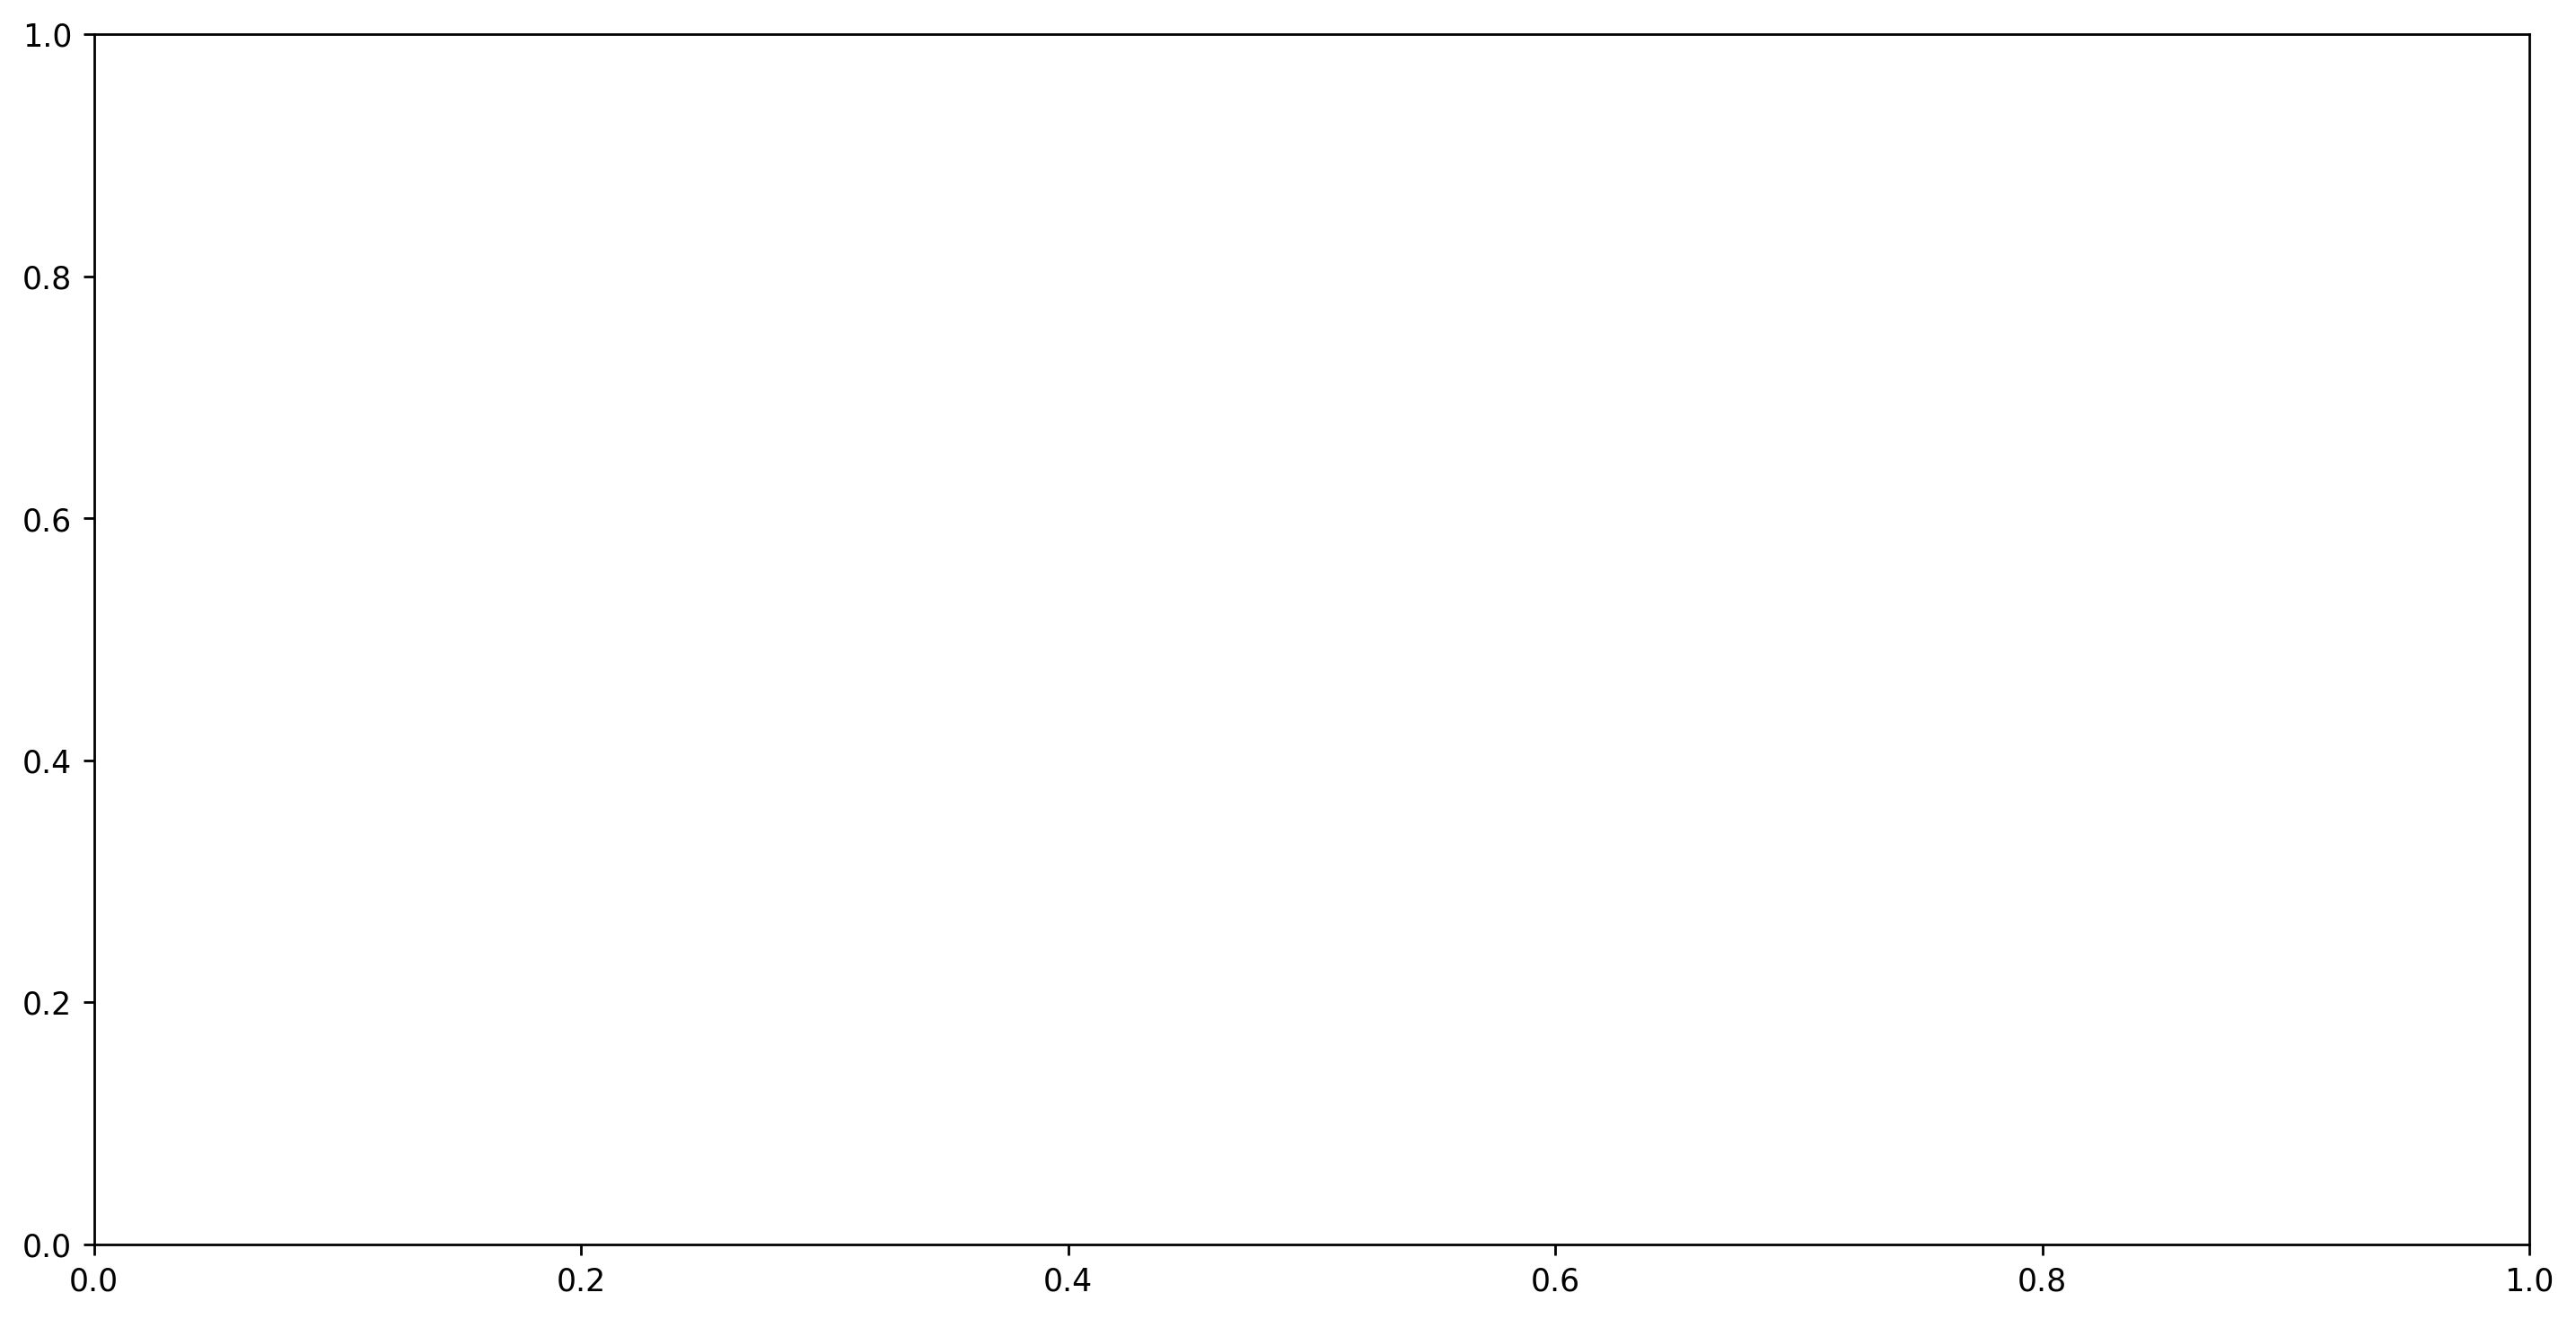

In [28]:
def arrow_inflexion(
   ax,
   start, end,
   angleA, angleB,
   radius=0,
   color="black",
   width=3,
   transform=None
):
   
   # get the coordinates
   x1, y1 = start
   x2, y2 = end
   
   # avoid division by zero
   epsilon = 1e-6
   if x2 == x1:
      x2 += epsilon
   if y2 == y1:
      y2 += epsilon
   
   # select right coordinates
   if transform is None:
      transform = ax.transData
   
   # add the arrow
   connectionstyle = f"angle,angleA={angleA},angleB={angleB},rad={radius},tail_width={width}"
   ax.annotate(
      "",
      xy=(x1, y1), xycoords=transform,
      xytext=(x2, y2), textcoords=transform,
      arrowprops=dict(
         color=color, arrowstyle="->",
         shrinkA=5, shrinkB=5,
         patchA=None, patchB=None,
         connectionstyle=connectionstyle,
      ),
   )

# initialize the figure
fig, ax = plt.subplots(figsize=(14,7))
arrow_inflexion(ax, (0.1, 0.2), (0.4, 0.5), 0, 90, radius=0.3)
plt.show()

Don't worry if this is confusing, we will go over each of these cases in the following sections.


## Quick reminder on figure and axes

In [Matplotlib](/matplotlib), the figure is the top-level container that **holds all the elements** of the chart. It is the canvas on which the chart is drawn. The axes are the **actual plot**. They are the region of the figure where the data is plotted.

One figure can contains **one or multiple axes**. In the case of multiple axes, they can be arranged in a grid, like in a subplot.

Here is an example of a figure with 2 (empty) axes:

![](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/graph/figure-explanations.png)

Reproduce it with:

```python
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.show()
```


## Data coordinates: `ax.transData`

The data coordinate system is the one that is used to plot the data. For example, if you create a [scatter plot](/scatter-plot) with x=[1,2,3] and y=[4,5,6], the data coordinate system will be the one that goes from 1 to 3 on the x-axis and from 4 to 6 on the y-axis.

It's the default coordinate system used by [Matplotlib](/matplotlib) when you plot data. You can access it with `ax.transData`. Let's see an example:

_Note: we specify `transform=ax.transData` but since it's the default one, you can omit it._


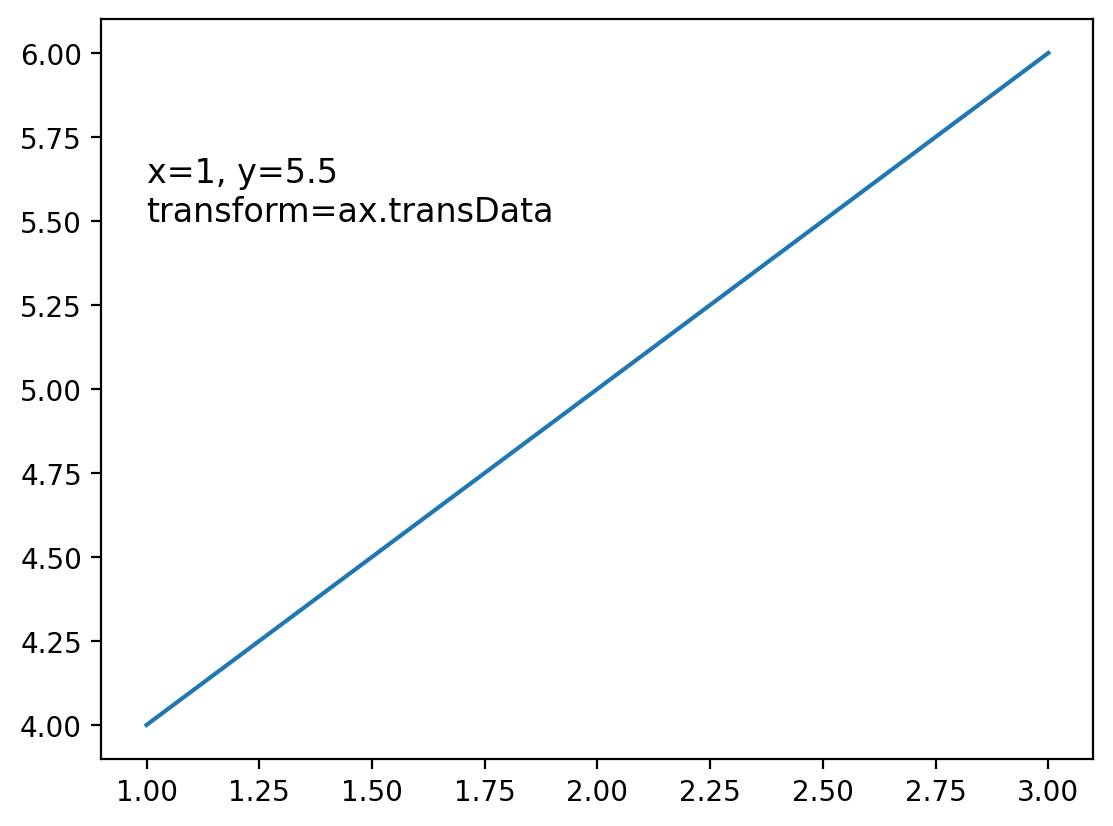

In [3]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots()
ax.plot(x, y)

# Data coordinates
ax.text(
   x=1, y=5.5,
   s='x=1, y=5.5\ntransform=ax.transData',
   transform=ax.transData,
   fontsize=12
)

plt.show()

## Axes coordinates: `ax.transAxes`

The axes coordinate system is the one that goes from 0 to 1 on each axis.

In this case, the positions will be relative to the axes: `(0,0)` is the **bottom-left** corner of the axes, and `(1,1)` is the **top-right** corner.


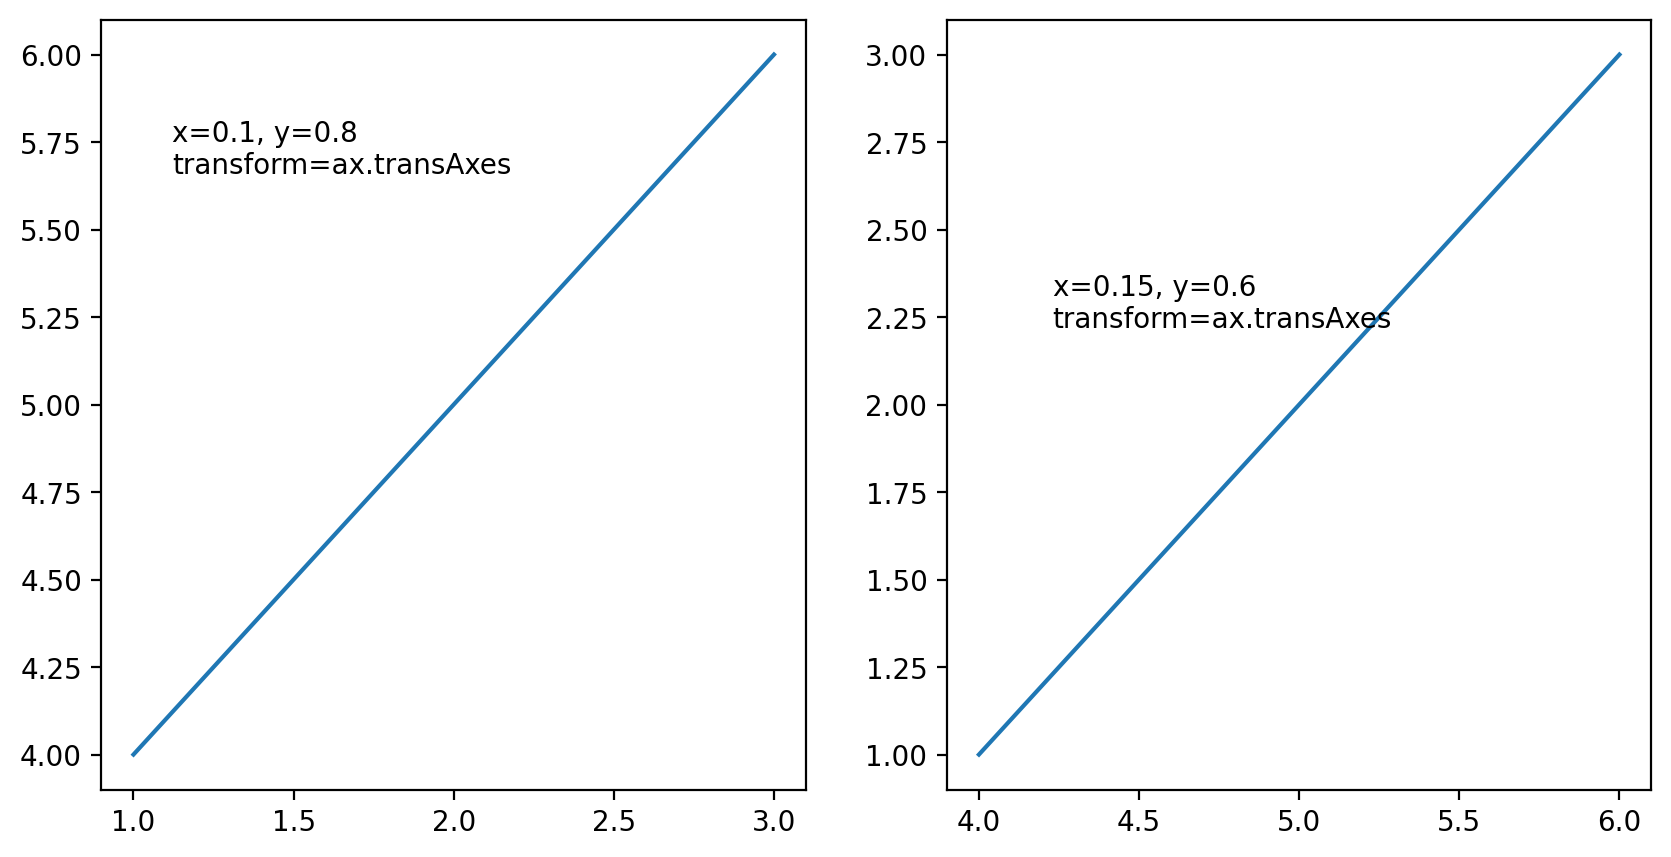

In [4]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(y, x)

# Axes coordinates for left subplot
ax[0].text(
   x=0.1, y=0.8,
   s='x=0.1, y=0.8\ntransform=ax.transAxes',
   transform=ax[0].transAxes,
   fontsize=10,
)

# Axes coordinates for right subplot
ax[1].text(
   x=0.15, y=0.6,
   s='x=0.15, y=0.6\ntransform=ax.transAxes',
   transform=ax[1].transAxes,
   fontsize=10,
)

plt.show()

## Figure coordinates: `fig.transFigure`

The **figure coordinate system** spans from **0 to 1** across the entire figure. This is the most intuitive system: the **bottom left corner** is **(0,0)**, and the **top right corner** is **(1,1)**.

It is particularly useful for adding **annotations** that are **absolute** to the figure, such as a **title** or **credit**.

An even cooler feature is that you can specify values **above 1** and **below 0**. For instance, to add a title slightly above the figure's top, you can use **`(0.5, 1.1)`** for the position.

_Note: The primary difference between **`ax.text()`** and **`fig.text()`** lies in the **coordinate system** used, meaning the following are equivalent:_

```python
fig, ax = plt.subplots()

# This line
ax.text(0.5, 0.5, 'text', transform=fig.transFigure)

# Is equivalent to this one
fig.text(0.5, 0.5, 'text')
```


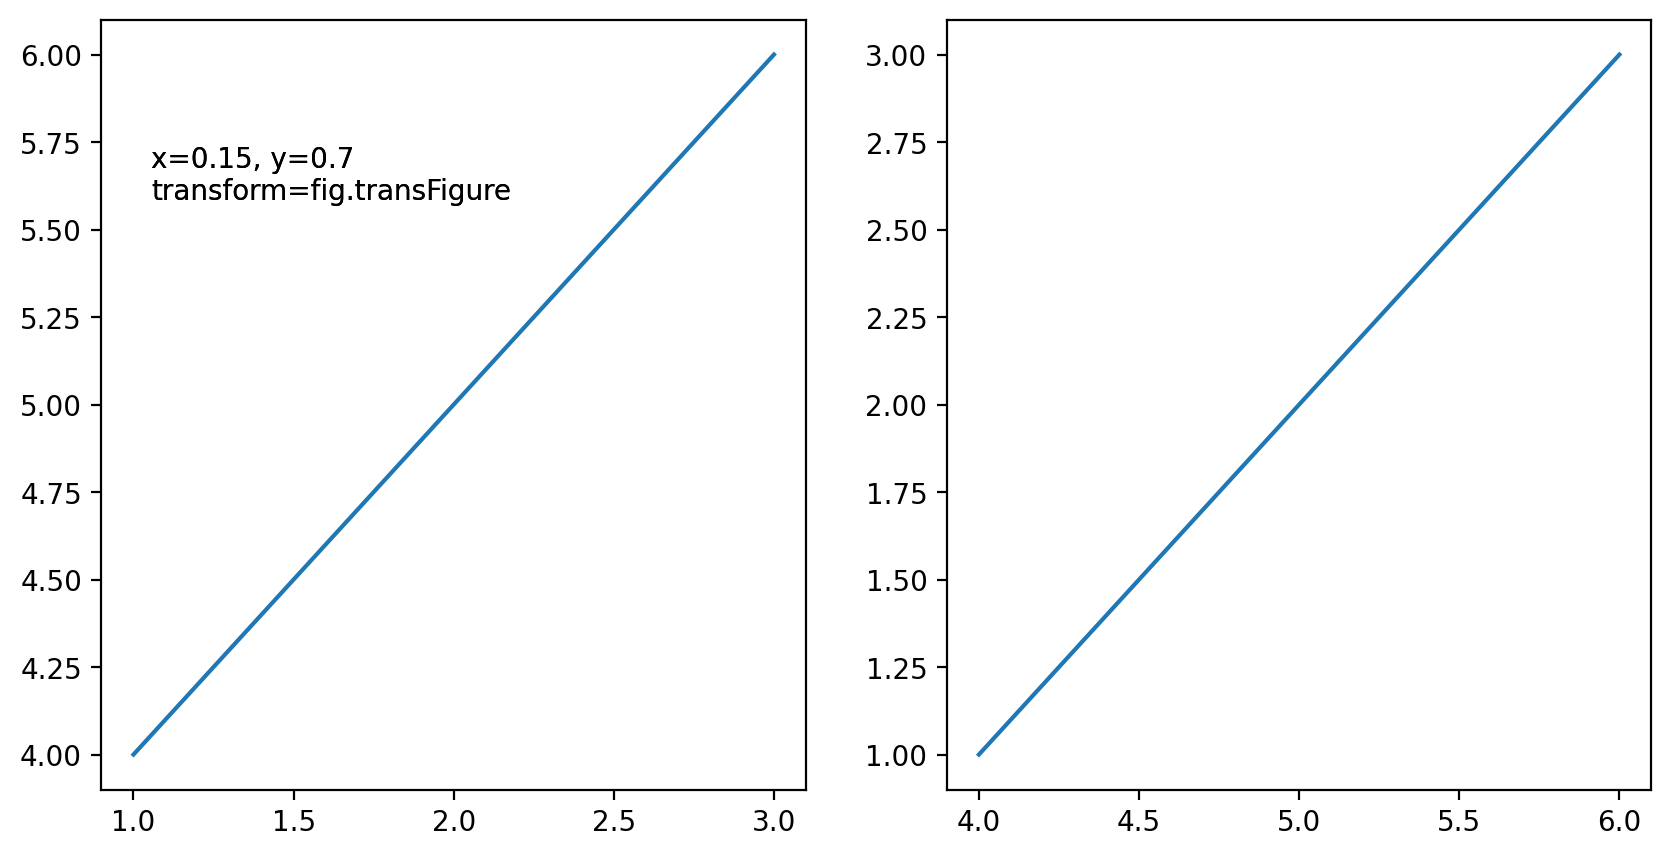

In [5]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(y, x)

# Figure coordinates
ax[0].text(
   x=0.15, y=0.7,
   s='x=0.15, y=0.7\ntransform=fig.transFigure',
   transform=fig.transFigure,
   fontsize=10,
)

# This is equivalent to the previous one: it will be displayed in the same position
ax[1].text(
   x=0.15, y=0.7,
   s='x=0.15, y=0.7\ntransform=fig.transFigure',
   transform=fig.transFigure,
   fontsize=10,
)

plt.show()

## Relative to x-axis and to y-axis

Thanks to the `ax.get_xaxis_transform()` and `ax.get_yaxis_transform()` functions, you can specify a position relative to the x-axis or the y-axis while the other coordinate is in data coordinates.


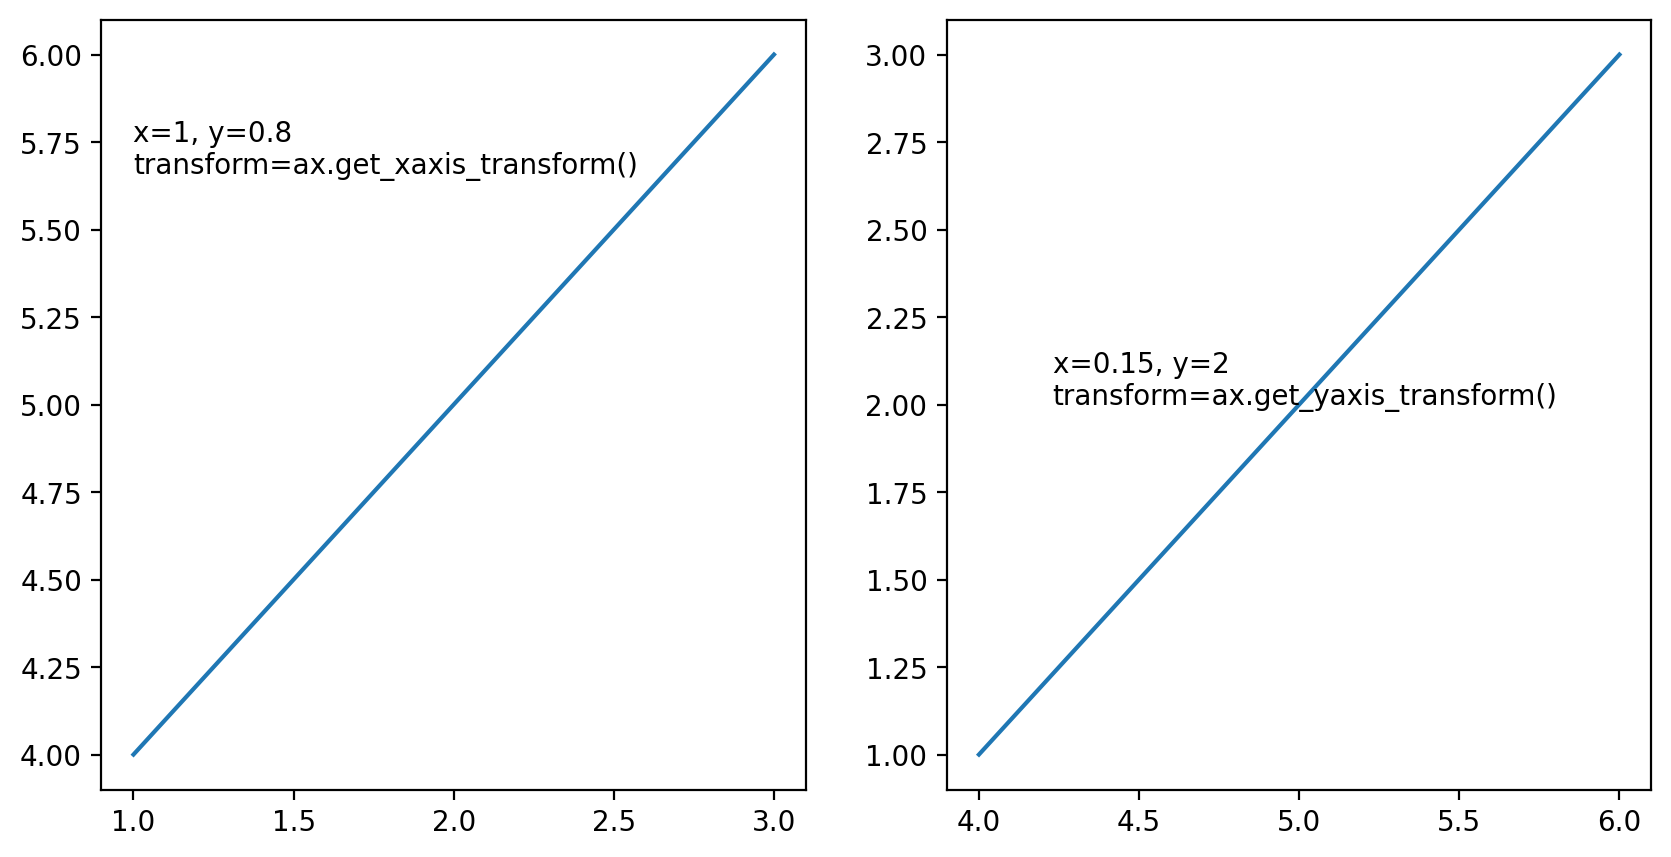

In [6]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(y, x)

# Semi-blended transformation: x in data coordinates, y in axes coordinates
ax[0].text(
   x=1, y=0.8,
   s='x=1, y=0.8\ntransform=ax.get_xaxis_transform()',
   transform=ax[0].get_xaxis_transform(),
   fontsize=10,
)

# Semi-blended transformation: y in data coordinates, x in axes coordinates
ax[1].text(
   x=0.15, y=2,
   s='x=0.15, y=2\ntransform=ax.get_yaxis_transform()',
   transform=ax[1].get_yaxis_transform(),
   fontsize=10,
)

plt.show()

## Physical coordinates: `fig.dpi_scale_trans`

Sometimes we want an object to be a certain physical size on the plot: for example, a **circle of 1cm radius**. This is what the `fig.dpi_scale_trans` is for. It allows you to specify the size of an object in **inches**.


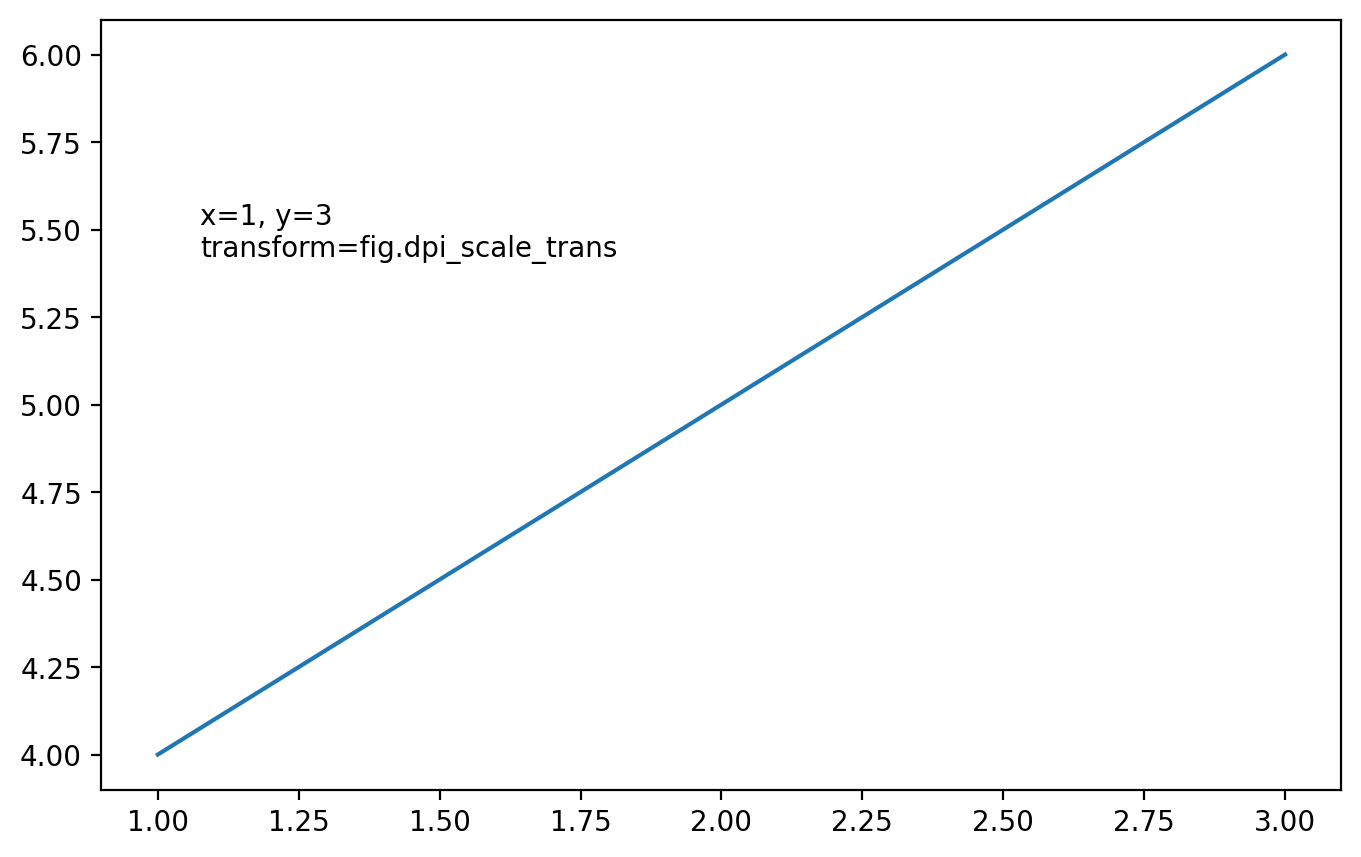

In [7]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y)

# Position in inches from the lower-left (x=0,y=0) corner of the figure
ax.text(
   x=1, y=3,
   s='x=1, y=3\ntransform=fig.dpi_scale_trans',
   transform=fig.dpi_scale_trans,
   fontsize=10,
)

plt.show()

## Going further

You might be interested in:

- create annotations with [different styles](/advanced-custom-annotations-matplotlib)
- how to create [rounded arrows](/how-to-create-and-custom-arrows-matplotlib)
- customize [fonts in matplotlib](/custom-fonts-in-matplotlib)
- how to [manage subplots](/194-split-the-graphic-window-with-subplot)
